In [8]:
import matplotlib.pyplot as plt
from scipy import stats

import numpy as np

## Questions

### Question 1
Calcule la **moyenne** et l'**écart-type** des temps de livraison.

In [9]:
data = np.array(
    [
        32,
        28,
        35,
        41,
        29,
        33,
        37,
        30,
        26,
        38,
        34,
        31,
        27,
        36,
        33,
        29,
        42,
        31,
        35,
        28,
        30,
        37,
        33,
        29,
        34,
        31,
        36,
        28,
        32,
        35,
    ]
)

n = len(data)
print(f"n = {n}")

n = 30


In [10]:
moyenne = data.mean()
print(f"Moyenne (x̄) = {moyenne:.2f}")
ecart_type = data.std(ddof=1)
print(f"Écart-type (s) = {ecart_type:.2f}")

Moyenne (x̄) = 32.67
Écart-type (s) = 4.03


### Question 2
Calcule l'**erreur standard**.

In [11]:
se = ecart_type / np.sqrt(n)
print(f"Erreur standard (SE) = {se:.2f}")

Erreur standard (SE) = 0.74


### Question 3
Construis l'**intervalle de confiance à 95%** pour le temps moyen de livraison.

In [16]:
confidence = 0.95
ic = stats.t.interval(confidence=confidence, df=n - 1, loc=moyenne, scale=se)

print(f"Intervalle de confiance à {confidence * 100:.0f}% : [{ic[0]:.2f}, {ic[1]:.2f}]")
print(f"Marge d'erreur : ± {(ic[1] - ic[0]) / 2:.2f}")

Intervalle de confiance à 95% : [31.16, 34.17]
Marge d'erreur : ± 1.50


### Question 4
PizzaRapide promet sur son site : **"Livré en moins de 35 minutes en moyenne"**.
D'après ton intervalle de confiance, cette promesse est-elle réaliste ?

-> La borne supérieure de l'intervalle de confiance est inférieure à 35 donc on peut supposer que la promesse est tenue à un niveau de confiance de 0.95.

### Question 5
Le directeur veut un intervalle plus précis (plus étroit). Que doit-il faire ?

-> Pour un intervalle plus précis, on peut augmenter la taille de l'échantillon (n) ou réduire le niveau de confiance (alpha).

### Question 6
Construis maintenant les IC à **90%** et **99%**. Compare les 3 intervalles (90%, 95%, 99%). Que constates-tu ?

-> On constate que plus le niveau de confiance est élevé, plus l'intervalle de confiance est grand.

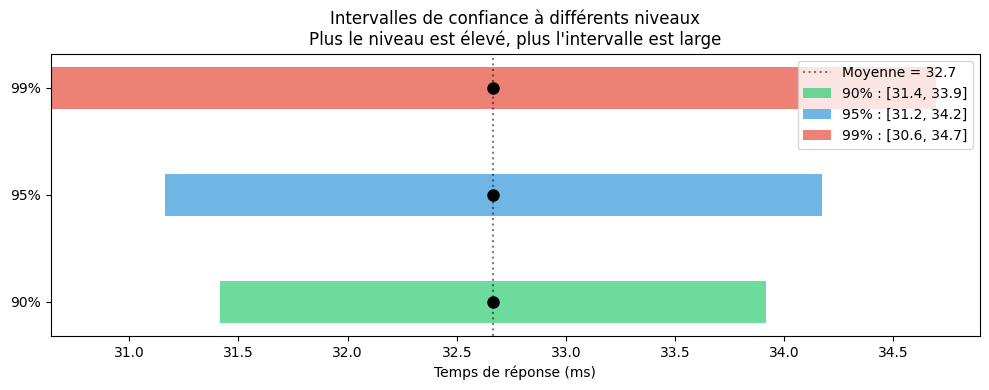

In [17]:
niveaux = [0.90, 0.95, 0.99]

fig, ax = plt.subplots(figsize=(10, 4))

colors = ["#2ecc71", "#3498db", "#e74c3c"]
for i, conf in enumerate(niveaux):
    ic = stats.t.interval(confidence=conf, df=n - 1, loc=moyenne, scale=se)
    largeur = ic[1] - ic[0]
    ax.barh(
        i,
        largeur,
        left=ic[0],
        height=0.4,
        color=colors[i],
        alpha=0.7,
        label=f"{conf * 100:.0f}% : [{ic[0]:.1f}, {ic[1]:.1f}]",
    )
    ax.plot(moyenne, i, "ko", markersize=8)

ax.axvline(
    moyenne, color="black", linestyle=":", alpha=0.5, label=f"Moyenne = {moyenne:.1f}"
)
ax.set_yticks(range(len(niveaux)))
ax.set_yticklabels([f"{c * 100:.0f}%" for c in niveaux])
ax.set_xlabel("Temps de réponse (ms)")
ax.set_title(
    "Intervalles de confiance à différents niveaux\nPlus le niveau est élevé, plus l'intervalle est large"
)
ax.legend(loc="upper right")
plt.tight_layout()
plt.show()